In [1]:
import pandas as pd

import glob

path='c:\\Users\dougw\Desktop\Analise-Polybench\Logs Idle de Energia'

files = [f for f in glob.glob(path + "**/*.txt", recursive=True)]

for f in files:
    print(f)

c:\Users\dougw\Desktop\Analise-Polybench\Logs Idle de Energia\2DCONV_H_A15_HF_1000000_IF_1000000_MF_600000_dev_0_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench\Logs Idle de Energia\2DCONV_H_A15_HF_1000000_IF_1000000_MF_600000_dev_1_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench\Logs Idle de Energia\2DCONV_H_A15_HF_1000000_IF_1400000_MF_600000_dev_0_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench\Logs Idle de Energia\2DCONV_H_A15_HF_1000000_IF_1400000_MF_600000_dev_1_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench\Logs Idle de Energia\2DCONV_H_A15_HF_1000000_IF_400000_MF_600000_dev_0_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench\Logs Idle de Energia\2DCONV_H_A15_HF_1000000_IF_400000_MF_600000_dev_1_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench\Logs Idle de Energia\2DCONV_H_A15_HF_1400000_IF_1000000_MF_600000_dev_0_log_energia.txt
c:\Users\dougw\Desktop\Analise-Polybench\Logs Idle de Energia\2DCONV_H_A15_HF_1400000_IF_1000000_MF

In [2]:
def group_results(file,name):
    df_temp = pd.DataFrame()
    dict_temp = {}    

    for line in file:
        if 'make' in line:
            continue
        else:
            if ":" in line:
                #print(line.split(':')[1].replace('s',''))
                key, value = line.split(':')[0], float(line.split(':')[1].replace('s',''))
                dict_temp[key] =  float(value)
                #print(key,':',value)
            else: 
                if 'm' in line:
                    key = line.split('\t')[0]
                    mi = int(line.split('\t')[1].split('m')[0])
                    se = float(line.split('\t')[1].split('m')[1].replace('s',''))
                    value = mi*60 + se
                    dict_temp[key] =  float(value)
                    #print(key,':',value)
                    if "sys" in line:
                        df_temp = df_temp.append(dict_temp, ignore_index=True)
                        dict_temp = dict.fromkeys(dict_temp, 0)

    df_temp = df_temp.mean().to_dict()
    
    app = name.split('\\')[-1].split('_')[0]
    Host = name.split('_')[2]
    Host_Freq = int(name.split('_')[4])
    Idle_Freq = int(name.split('_')[6])
   
    if Host == 'A15':
        A15_Freq = Host_Freq
        A7_Freq = Idle_Freq
        
    if Host == 'A7':
        A7_Freq = Host_Freq
        A15_Freq = Idle_Freq
        
    if(int(name.split('_')[10]) == 0):
        dev = 'GPU'
    else:
        dev = Host
        
    GPU_Freq = 600000000.0   
    
    df_temp['App'] = app
    df_temp['Host'] = Host
    df_temp['Dev'] = str(dev)
    df_temp['A15_Freq'] = A15_Freq
    df_temp['A7_Freq'] = A7_Freq
    df_temp['GPU_Freq'] = GPU_Freq
    #df_temp['Idle1_Freq'] = idle1_freq
    #df_temp['Idle2'] = idle2_dev
    #df_temp['Idle2_Freq'] = idle2_freq
    
    return df_temp

In [3]:
df = pd.DataFrame()

for path in files:
    log_data=open(path,'r')
    temp_dict = group_results(log_data, path)
    df = df.append(temp_dict, ignore_index=True)
    col = df['GPU_Freq']
    df.drop(labels=['GPU_Freq'], axis=1,inplace = True)
    df.insert(0, 'GPU_Freq', col)
    col = df['A7_Freq']
    df.drop(labels=['A7_Freq'], axis=1,inplace = True)
    df.insert(0, 'A7_Freq', col)
    col = df['A15_Freq']
    df.drop(labels=['A15_Freq'], axis=1,inplace = True)
    df.insert(0, 'A15_Freq', col)
    col = df['Dev']
    df.drop(labels=['Dev'], axis=1,inplace = True)
    df.insert(0, 'Dev', col)
    col = df['Host']
    df.drop(labels=['Host'], axis=1,inplace = True)
    df.insert(0, 'Host', col)
    col = df['App']
    df.drop(labels=['App'], axis=1,inplace = True)
    df.insert(0, 'App', col)


In [4]:
to_remove = ['App','Host','Dev','A15_Freq','A7_Freq','GPU_Freq','real','sys','user']
df['Total_Acumulada'] = df.loc[:,~df.columns.isin(to_remove)].sum(axis=1)

df['EDP'] = df['Total_Acumulada']*df['real']
df['A15_Power'] = df['A15_Acumulada']/df['real']
df['A7_Power'] = df['A7_Acumulada']/df['real']
df['MEM_Power'] = df['MEM_Acumulada']/df['real']
df['GPU_Power'] = df['GPU_Acumulada']/df['real']
df['A15_Freq'] = (df['A15_Freq'] / 10000).map('{0:g}'.format).astype(str)
df['A7_Freq'] = (df['A7_Freq'] / 10000).map('{0:g}'.format).astype(str)
df['GPU_Freq'] = (df['GPU_Freq'] / 1000000).map('{0:g}'.format).astype(str)
df

,App,Host,Dev,A15_Freq,A7_Freq,GPU_Freq,A15_Acumulada,A7_Acumulada,GPU_Acumulada,MEM_Acumulada,real,sys,user,Total_Acumulada,EDP,A15_Power,A7_Power,MEM_Power,GPU_Power
0,2DCONV,A15,GPU,100,100,600,3.359609,0.393837,0.413309,0.543915,6.0376,1.1083,4.7077,4.710669,28.441137,0.556448,0.065231,0.090088,0.068456
1,2DCONV,A15,A15,100,100,600,4.311673,0.423279,0.404772,0.660535,6.1519,1.0010,5.7060,5.800258,35.682610,0.700869,0.068805,0.107371,0.065796
2,2DCONV,A15,GPU,100,140,600,3.257579,0.727040,0.417100,0.515334,6.0206,1.0839,4.7250,4.917054,29.603614,0.541072,0.120759,0.085595,0.069279
3,2DCONV,A15,A15,100,140,600,4.421417,0.821155,0.404862,0.653591,6.1184,0.9802,5.7242,6.301024,38.552188,0.722643,0.134211,0.106824,0.066171
4,2DCONV,A15,GPU,100,40,600,3.651329,0.156945,0.549125,0.608304,6.1716,1.1871,4.7486,4.965702,30.646328,0.591634,0.025430,0.098565,0.088976
5,2DCONV,A15,A15,100,40,600,4.454369,0.171045,0.405789,0.647026,6.2451,1.0800,5.7360,5.678229,35.461108,0.713258,0.027389,0.103605,0.064977
6,2DCONV,A15,GPU,140,100,600,4.316624,0.306199,0.464835,0.429349,4.9852,0.9270,3.8477,5.517008,27.503386,0.865888,0.061422,0.086125,0.093243
7,2DCONV,A15,A15,140,100,600,4.866823,0.301052,0.289337,0.453167,4.9894,0.8058,4.6228,5.910379,29.489243,0.975433,0.060338,0.090826,0.057990
8,2DCONV,A15,GPU,140,140,600,4.431020,0.589120,0.411210,0.425060,4.9797,0.9236,3.8483,5.856410,29.163167,0.889817,0.118304,0.085359,0.082577
9,2DCONV,A15,A15,140,140,600,4.955639,0.586794,0.288421,0.456443,4.9815,0.8027,4.6115,6.287297,31.320171,0.994809,0.117795,0.091628,0.057898


In [25]:
df['Config'] = 'A15'+':'+df['A15_Freq'].astype(str)+"MHz"+ ' | ' + 'A7'+':'+df['A7_Freq'].astype(str)+"MHz"+' | '+'GPU'+':'+ df['GPU_Freq'].astype(str)+"MHz"

In [23]:
apps = list(set(df['App']))
df_config_plot = pd.DataFrame()

for app in apps:
    df_edp = df[df['App'] == app]
    df_edp = df_edp.sort_values('EDP')
    df_edp = df_edp.reset_index()
    
    to_add = []
    for i in range(15):
        to_add.append(df_edp.iloc[i])
        
    df_config_plot = df_config_plot.append(to_add, ignore_index=True)
    df_config_plot = df_config_plot.drop(columns=['index'])


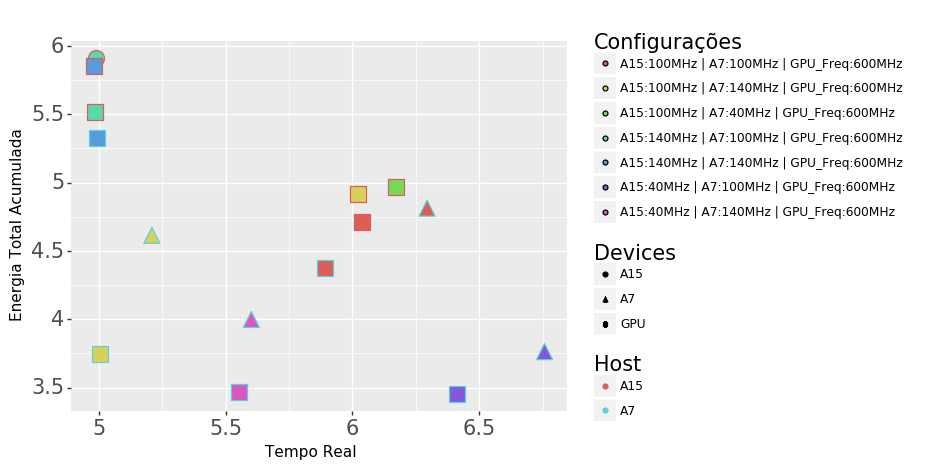

<ggplot: (136704154169)>

In [42]:
from plotnine import *
#for app in apps:
(ggplot(df_config_plot[df_config_plot['App'] == '2DCONV'], aes(x='real', y='Total_Acumulada',fill = 'Config', shape = 'Dev',color = 'Host', size = 15)) +\
     geom_point() +\
     guides(size = False) +\
     labs(fill = 'Configurações', shape = 'Devices' ) +\
     #facet_wrap(["App"], scales = "free") +\
     labs(x = "Tempo Real", y = 'Energia Total Acumulada') +\
     theme(axis_text_x = element_text(angle=0, hjust=0.5,size=15),axis_text_y = element_text(angle=0, hjust=1,size=15), legend_title = element_text(size=15))
)